In [1]:
import numpy as np
import matplotlib.pyplot as plt

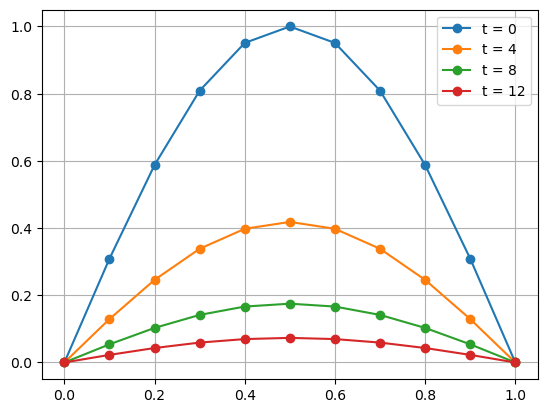

In [15]:
a = 2
dx = 0.1
dt = 0.01
tmax = 12

x = np.arange(0, 1+dx, dx)
nmax = len(x)
q = np.sin(np.pi * x)

plt.plot(x, q, marker='o', label=f"t = {0}")

for t in range(1, tmax+1):
    qold = q.copy()
    for i in range(1, nmax-1):
        q[i] = qold[i] + a * dt * (qold[i+1] - 2*qold[i] + qold[i-1])/dx**2
    
    if t % 4 == 0:
        plt.plot(x, q, marker='o', label=f"t = {t}")

plt.grid()
plt.legend(loc='upper right')
plt.show()

4.4

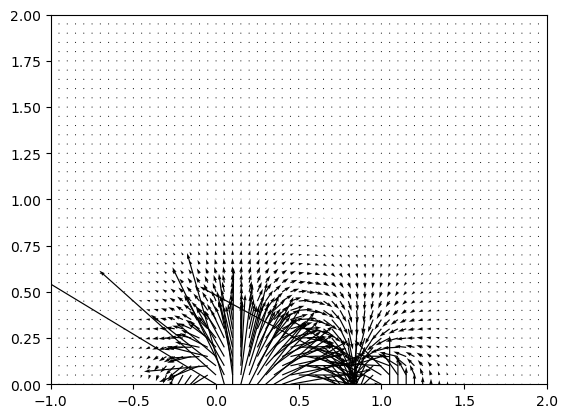

In [81]:
dx = 0.05
dy = 0.05
x = np.arange(-1, 2, dx)
y = np.arange(0, 2, dy)
X, Y = np.meshgrid(x, y)
nx = len(x)
ny = len(y)
phi = np.zeros([nx, ny])

M = 0.1
iteration = 100

for t in range(iteration):
    
    phi[[0, nx-1], :] = 0.0
    phi[:, ny-1] = 0.0
    for i in range(nx):
        if (x[i] >= 0 and x[i] <= 1):
            phi[i, 0] = phi[i, 1] - (0.4 * (1.0 - 2.0 * x[i])) * dy 
        else:
            phi[i, 0] = 0.0
     
    for i in range(1, nx-1):
        for j in range(1, ny-1):
            phi[i, j] = ((1.0 - M**2)/dx**2 * (phi[i-1, j] + phi[i+1, j]) + 1.0/dy**2 * (phi[i, j-1] + phi[i, j+1])) \
                      / (2.0*(1.0-M**2)/dx**2 + 2.0/dy**2)


u = (np.roll(phi, -1, axis=0) - np.roll(phi, 1, axis=0)) / (2.0 * dx)
u[0, :] = (phi[1, :] - phi[0, :]) / dx
u[-1, :] = (phi[-1, :] - phi[-2, :]) / dx
v = (np.roll(phi, -1, axis=1) - np.roll(phi, 1, axis=1)) / (2.0 * dy)
v[:, 0] = (phi[:, 1] - phi[:, 0]) / dx
v[:, -1] = (phi[:, -1] - phi[:, -2]) / dx

plt.quiver(X, Y, u.T, v.T)
plt.xlim(-1, 2)
plt.ylim(0, 2)
plt.show()